<a href="https://colab.research.google.com/github/Cree0618/Notebooks/blob/master/WORKING_mobile_app_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Cree0618/Object-Detection-Android-App.git

Cloning into 'Object-Detection-Android-App'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 123 (delta 14), reused 87 (delta 1), pack-reused 0
Receiving objects: 100% (123/123), 10.19 MiB | 21.75 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.4/778.4 kB 3.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [14]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.4 MB/s eta 0:00:00


In [15]:
!pip install opencv-python-headless

In [ ]:
!nvidia-smi

Sun May 26 16:29:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
from ultralytics import YOLO

# Load a model
model = YOLO("license_plate_detector.pt")


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git


Cloning into 'ultralytics'...
remote: Enumerating objects: 27155, done.
remote: Counting objects: 100% (1811/1811), done.
remote: Compressing objects: 100% (950/950), done.
remote: Total 27155 (delta 1198), reused 1337 (delta 857), pack-reused 25344
Receiving objects: 100% (27155/27155), 15.88 MiB | 12.28 MiB/s, done.
Resolving deltas: 100% (19162/19162), done.


In [25]:
results = model("/content/test_image.jpg")
# results is a list of results for each image
for result in results:
    # Access the boxes attribute, which contains the bounding boxes
    bboxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes
  # Extract bounding boxes

import easyocr
reader = easyocr.Reader(['en'])  # Use 'en' for English

import cv2

image = cv2.imread('/content/test_image.jpg')

for bbox in bboxes:
    x1, y1, x2, y2 = map(int, bbox[:4])
    cropped_plate = image[y1:y2, x1:x2]
    ocr_result = reader.readtext(cropped_plate)

    for detection in ocr_result:
        text, confidence = detection[1], detection[2]
        print(f'Detected license plate text: {text} with confidence: {confidence}')



image 1/1 /content/test_image.jpg: 448x640 1 license_plate, 171.1ms
Speed: 4.9ms preprocess, 171.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Detected license plate text: 8AC _ with confidence: 0.17296209920219036
Detected license plate text: 8025 with confidence: 0.6626120763232886


Detected license plate text: 8AC _ with confidence: 0.17296209920219036
Detected license plate text: 8025 with confidence: 0.6626120763232886


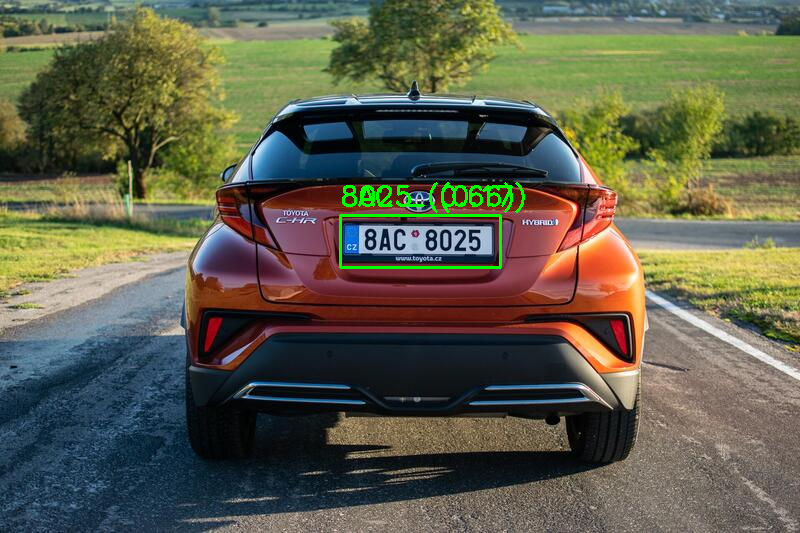

In [33]:
## overlaying the results
# Read the image
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/test_image.jpg')

# Process each result
for result in results:
    # Extract bounding boxes
    bboxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes

    # Iterate through each detected box
    for bbox in bboxes:
        x1, y1, x2, y2 = map(int, bbox[:4])
        cropped_plate = image[y1:y2, x1:x2]
        ocr_result = reader.readtext(cropped_plate)

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Overlay the OCR text
        for detection in ocr_result:
            text, confidence = detection[1], detection[2]
            cv2.putText(image, f'{text} ({confidence:.2f})', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            print(f'Detected license plate text: {text} with confidence: {confidence}')

# Save or display the resulting image
cv2.imwrite('output_with_ocr2.jpg', image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detected license plate text: 8AC _8025


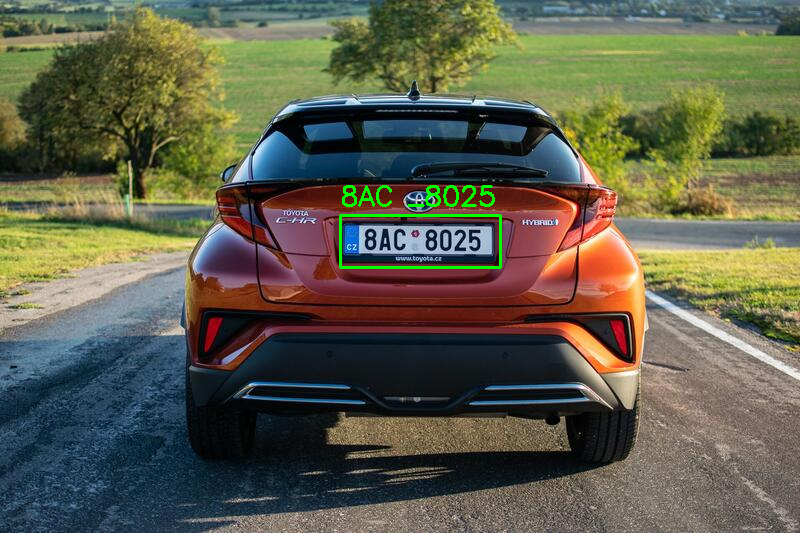

In [34]:
## overlaying the results
# Read the image
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/test_image.jpg')

# Process each result
for result in results:
    # Extract bounding boxes
    bboxes = result.boxes.xyxy.cpu().numpy()  # Extract bounding boxes

    # Initialize a list to hold the OCR results
    full_text = ""

    # Iterate through each detected box
    for bbox in bboxes:
        x1, y1, x2, y2 = map(int, bbox[:4])
        cropped_plate = image[y1:y2, x1:x2]
        ocr_result = reader.readtext(cropped_plate)

        # Concatenate the OCR results
        for detection in ocr_result:
            text = detection[1]
            full_text += text

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Overlay the concatenated OCR text
    if full_text:
        cv2.putText(image, full_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        print(f'Detected license plate text: {full_text}')

# Save or display the resulting image
cv2.imwrite('output_with_ocr.jpg', image)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
success=model.export(format='tflite')

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'license_plate_detector.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 141.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 133.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 94.3 MB/s eta 0:00:00
  

100%|██████████| 1.11M/1.11M [00:00<00:00, 19.5MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 37.78file/s]



ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 2.5s, saved as 'license_plate_detector.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 53.5s, saved as 'license_plate_detector_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'license_plate_detector_saved_model/license_plate_detector_float32.tflite' (11.7 MB)

Export complete (57.1s)
Results saved to /content
Predict:         yolo predict task=detect model=license_plate_detector_saved_model/license_plate_detector_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=license_plate_detector_saved_model/license_plate_detector_float32.tflite imgsz=640 data=config.yaml  
Visualize:       https://netron.app
